<a href="https://colab.research.google.com/github/hou-rai3/f/blob/main/%E8%AA%B2%E9%A1%8C04_07_OM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VS 最強スライム**
#**概要**
このプログラムは、IPython環境で動作するシンプルなターン制バトルゲームです。プレイヤーは勇者ハロルドを操作し、スライムとの戦闘を楽しむことができます。敵であるスライムは、一定条件で強化形態に進化し、プレイヤーに強力な攻撃を仕掛けてきます。プレイヤーは「攻撃」、「防御」、「魔法」の3つのコマンドから行動を選び、スライムを倒すことが目標です。

#**操作方法**

勇者ハロルドの初期HPは50、スライムの初期HPは8です。
勇者ハロルドの攻撃力は20〜50の間でランダムに設定されます。
スライムは弱い攻撃（1〜3のランダムな攻撃力）と強い攻撃（100〜150のランダムな攻撃力でいずれも勇者ハロルドを一撃で倒す）を持ちます。

コマンド選択
プレイヤーは「攻撃」、「防御」、「魔法」の3つのコマンドから選択します。
コマンドを選択した後、「行動」ボタンをクリックして行動を実行します。
戦闘の流れ

「攻撃」：勇者ハロルドがスライムに攻撃を行います。スライムのHPが0以下になると、強化形態に進化します。強化スライムを倒すとゲームクリアです。

「防御」：勇者ハロルドが防御を行い、スライムの攻撃によるダメージを軽減します。

「魔法」：勇者ハロルドが魔法を使用し、次の攻撃の攻撃力が大幅に上昇します。

「ゲームオーバー」

勇者ハロルドのHPが0以下になるとゲームオーバーとなり、ゲームは終了します。
#**制作者のコメント**
このプログラムは、Pythonを使ってシンプルながらも魅力的なバトルシステムを実現するためのものです。プレイヤーは「勇者ハロルド」として、かわいらしいが手強い「スライム」との戦闘に挑みます。戦闘シーンでは、攻撃や防御、魔法といった選択肢を駆使しながら、スライムを倒すことが目的です。

このゲームでは、ランダム性を取り入れた攻撃力の変動や、スライムの進化といった要素が、プレイヤーに対して毎回異なる体験を提供します。特に、スライムが進化して強力な「強化スライム」になる瞬間は、戦闘の緊張感を一気に高めます。プレイヤーは、ハロルドの攻撃力を最大限に活用しながら、強化スライムに打ち勝つための戦略を考える必要があります。

また、画像を用いたアニメーションも魅力の一つです。視覚的な要素を加えることで、単なるテキストベースのゲーム以上の臨場感を味わうことができ、プレイヤーにより没入感のあるゲーム体験を提供します。

このプログラムは、Python環境で手軽にターン制バトルを楽しみたい方や、プログラミングの練習としてバトルシステムの構築に挑戦したい方にとって、最適なプロジェクトとなるでしょう。ぜひ、多彩な戦略を試しながら、勇者ハロルドの冒険を楽しんでください。
# **作成時間**
作成時間：11時間

この課題に関連して行なった調査や学習に要した時間も含めて、全体で約11時間を費やしました。特に、アニメーション表示や戦闘システムの実装に多くの時間を要しました。

勇者ハロルドの前にスライムがあらわれた。


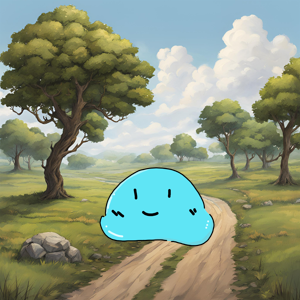

勇者ハロルドのHP「50」、スライムのHP「8」。


Dropdown(description='コマンド:', options=('攻撃', '防御', '魔法'), value='攻撃')

Button(description='行動', style=ButtonStyle())

Label(value='')

In [ ]:
%reset -f
import random
import time
import requests
import ipywidgets as widgets
from IPython.display import display, Image, clear_output

# キャラクターの定義
hero_name = "勇者ハロルド"
enemy_name = "スライム"

# 初期HPの設定
hero_hp = 50
enemy_hp = 8

# 攻撃力の設定
hero_attack = random.randint(20, 50)  # 勇者ハロルドの攻撃力（20～50の間のランダムな値）
enemy_attack_weak = random.randint(1, 3)  # スライムの弱い攻撃力（1～3の間のランダムな値）
enemy_attack_strong = random.randint(100, 150)  # スライムの強い攻撃力（100～150の間のランダムな値）
enemy_turn_counter = 0
is_enemy_ex = False  # 強化スライムかどうかのフラグ

# 画像URL
強化スライム登場 = 'https://drive.google.com/uc?export=download&id=1gE_GOgtzQDQGYjkOfLWPAey4ZDsjT-Dj'
強化スライム退場 = 'https://drive.google.com/uc?export=download&id=11waYq_MUSBdWBjBwtN73UhRv9WFHsHMU'
ハロルドの攻撃強化スライム = 'https://drive.google.com/uc?export=download&id=19qEhLRfDmctaC-g-VNYxltYFneb8s4FP'
強化スライムの強化攻撃 = 'https://drive.google.com/uc?export=download&id=1pLFtL5fRY54DskzBmX3PWRP8wF4MoSBd'
通常スライム登場 = 'https://drive.google.com/uc?export=download&id=1ydy636sqoxDHfJt4BNEsGijDapIPEdBT'
通常スライム退場 = 'https://drive.google.com/uc?export=download&id=14QgQhy8BwTEWmmj80T1qzTJmgZFMsq9m'
ハロルドの攻撃通常スライム = 'https://drive.google.com/uc?export=download&id=1U5pHInyiLbTbC56C4jNZsmGno8ivjmcL'
通常スライムに通常攻撃 = 'https://drive.google.com/uc?export=download&id=11R8J00DeRipNarq2KZQ1jSIRBZu_r1d8'
Gameover = 'https://drive.google.com/uc?export=download&id=1LewpryUSXMPoQpnAMStUekNlMoan4zVr'

# 画像を表示する関数
def display_image(image_url):
    response = requests.get(image_url)
    image = Image(data=response.content)
    display(image)

# 勇者ハロルドの攻撃アニメーションを表示する関数
def display_hero_attack():
    if is_enemy_ex:
        display_image(ハロルドの攻撃強化スライム)
    else:
        display_image(ハロルドの攻撃通常スライム)

# スライムの攻撃アニメーションを表示する関数
def display_enemy_attack():
    if is_enemy_ex:
        display_image(強化スライムの強化攻撃)
        time.sleep(1.0)
        clear_output_display()
    else:
        display_image(通常スライムに通常攻撃)
        time.sleep(1.0)
        clear_output_display()

# スライムの死亡アニメーションを表示する関数
def display_enemy_die():
    if is_enemy_ex:
        display_image(強化スライム退場)
        time.sleep(1.0)
    else:
        display_image(通常スライム退場)
        time.sleep(1.0)

# 勇者ハロルドの死亡アニメーションを表示する関数
def display_hero_die():
    display_image(Gameover)

# スライムを強化スライムに進化させる関数
def EX_slaim():
    global enemy_hp, enemy_attack_weak, enemy_attack_strong, is_enemy_ex
    print("スライムが進化する")
    clear_output_display()
    enemy_hp = 99999
    enemy_attack_weak = random.randint(1, 3)
    enemy_attack_strong = random.randint(100, 150)
    is_enemy_ex = True
    print(f"{hero_name}の前に強化{enemy_name}があらわれた。")
    display_image(強化スライム登場)
    time.sleep(1.5)
    print(f"{hero_name}のHP「{hero_hp}」、{enemy_name}のHP「{enemy_hp}」。")
    time.sleep(1.5)

# 戦闘の開始を表示
print(f"{hero_name}の前に{enemy_name}があらわれた。")
display_image(通常スライム登場)
time.sleep(1.5)
print(f"{hero_name}のHP「{hero_hp}」、{enemy_name}のHP「{enemy_hp}」。")
time.sleep(1.5)

# 選択肢の作成
options = ['攻撃', '防御', '魔法']
dropdown = widgets.Dropdown(options=options, value=options[0], description='コマンド:')
button = widgets.Button(description="行動")
output = widgets.Label()

# 出力をクリアする関数
def clear_output_display():
    clear_output(wait=True)
    display(dropdown, button, output)

# ボタンがクリックされたときの動作
def on_button_clicked(b):
    global hero_hp, enemy_hp, hero_attack, enemy_turn_counter, is_enemy_ex
    choice = dropdown.value
    clear_output_display()
    if choice == '攻撃':
        # 勇者ハロルドの攻撃
        damage_to_enemy = hero_attack
        enemy_hp -= damage_to_enemy
        display_hero_attack()
        output.value = f"{hero_name}の攻撃、{enemy_name}に{damage_to_enemy}のダメージ!! {enemy_name}の HP {enemy_hp + damage_to_enemy} -> {enemy_hp}"
        time.sleep(1.5)
        # 敵が倒れたかのチェック
        if enemy_hp <= 0:
            display_enemy_die()
            output.value += f"\n{enemy_name}を倒した！"
            time.sleep(1.5)
            if is_enemy_ex:
                output.value += "\n戦闘が終了しました。"
                clear_output_display()
                return
            EX_slaim()
            return
        # スライムの攻撃
        if enemy_turn_counter % 2 == 0:
            damage_to_hero = enemy_attack_weak
        else:
            damage_to_hero = enemy_attack_strong
        enemy_turn_counter += 1
        clear_output_display()
        hero_hp -= damage_to_hero
        display_enemy_attack()
        output.value += f"\n{enemy_name}の攻撃、{hero_name}に{damage_to_hero}のダメージ!! {hero_name}の HP {hero_hp + damage_to_hero} -> {hero_hp}"
        time.sleep(1.5)
        # 勇者ハロルドが倒れたかのチェック
        if hero_hp <= 0:
            clear_output_display()
            display_hero_die()
            output.value += f"\n{hero_name}は倒れた..."
            time.sleep(1.5)
            return
    elif choice == '防御':
        # 防御の処理
        clear_output_display()
        display_hero_attack()
        output.value = f"{hero_name}は防御した！"
        time.sleep(1.5)
        damage_to_hero = 1
        hero_hp -= damage_to_hero
        output.value += f"\n{enemy_name}の攻撃、しかし{hero_name}はダメージを軽減した！ {hero_name}の HP {hero_hp + damage_to_hero} -> {hero_hp}"
        display_enemy_attack()
        time.sleep(1.5)
    elif choice == '魔法':
        # 魔法の処理
        clear_output_display()
        display_hero_attack()
        hero_attack *= 50
        output.value = f"{hero_name}は魔法を使った！攻撃力が大幅に上昇！"
        display_enemy_attack()
        time.sleep(1.5)
        # スライムの攻撃
        if enemy_turn_counter % 2 == 0:
            damage_to_hero = enemy_attack_weak
        else:
            damage_to_hero = enemy_attack_strong
        enemy_turn_counter += 1
        clear_output_display()
        hero_hp -= damage_to_hero
        display_enemy_attack()
        output.value += f"\n{enemy_name}の攻撃、{hero_name}に{damage_to_hero}のダメージ!! {hero_name}の HP {hero_hp + damage_to_hero} -> {hero_hp}"
        time.sleep(1.5)
        # 勇者ハロルドが倒れたかのチェック
        if hero_hp <= 0:
            display_hero_die()
            output.value += f"\n{hero_name}は倒れた..."
            time.sleep(1.5)

# ボタンに動作を紐づける
button.on_click(on_button_clicked)

# ウィジェットを表示
display(dropdown, button, output)
